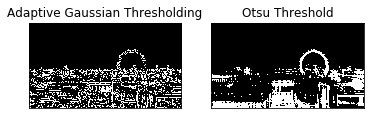

In [17]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/Users/frodo/Desktop/mean.png',0)
img = cv.medianBlur(img,5)
# ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
#             cv.THRESH_BINARY,11,2)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY_INV,11,2)
ret, th3 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# titles = ['Original Image', 'Global Thresholding (v = 127)',
#             'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
titles = ['Adaptive Gaussian Thresholding','Otsu Threshold']
images = [th2, th3]
for i in xrange(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [1]:
# import the necessary packages
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
 
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the image file")
# args = vars(ap.parse_args())
# load the image, convert it to grayscale, and blur it
# image = cv2.imread(args["image"])
image = cv2.imread('/Users/frodo/Desktop/')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]
# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
 
# loop over the unique components
for label in np.unique(labels):
	# if this is the background label, ignore it
	if label == 0:
		continue
 
	# otherwise, construct the label mask and count the
	# number of pixels 
	labelMask = np.zeros(thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# if the number of pixels in the component is sufficiently
	# large, then add it to our mask of "large blobs"
	if numPixels > 300:
		mask = cv2.add(mask, labelMask)
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]
 
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
	(x, y, w, h) = cv2.boundingRect(c)
	((cX, cY), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(cX), int(cY)), int(radius),
		(0, 0, 255), 3)
	cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)

error: OpenCV(3.4.1) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cvtColor
